# Standardized Testing
*Addison Hanrattie*
## 1 Setup

This dataset records test data with demographics and test prep. My objective here is to understand what affects students scores the most and in what ways they do so. Being able to understand what allows a given student to perform best can help us understand both biases within society and also understand what preparatory steps are the most important which as someone in the middle of finals I find very important. Thus through this analysis we will run a number of tests to identify the significance of biases within the dataset, effects of features on score, and finally build a model for predicting scores which could help a student identify how well they specifically might do.
## 1.1 Supporting Packages

In [590]:
import pandas as pd
import scipy
# from scipy.stats import ttest_ind, t
from scipy import stats
from matplotlib import pyplot as plt
import numpy as np

from sklearn.neighbors import KNeighborsRegressor, RadiusNeighborsRegressor
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor


## 1.2 Getting The Data
The dataset I am using is from Kaggle found here https://www.kaggle.com/datasets/spscientist/students-performance-in-exams. It includes 1000 different students recording 5 observations of their demographics (gender, race/ethnicity, parental education, their lunch, test preparation) and 3 different test scores across math, reading, and writing. 

In [591]:
df = pd.read_csv("StudentsPerformance.csv")
print(df.shape)

df

(1000, 8)


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


## 1.2.1 Sanitization / Cleanup
The data has come in a fairly useable format from kaggle the only thing I will need to do is to one hot encode all the observations as they are all categorical. To reduce the number of redundant columns I will drop the first one when encoding.

In [592]:
tests = ["math score", "reading score", "writing score"]
features = pd.get_dummies(df.drop(tests, axis=1), drop_first=True)
print(features.shape)

features

(1000, 12)


,gender_male,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_standard,test preparation course_none
0,0,1,0,0,0,1,0,0,0,0,1,1
1,0,0,1,0,0,0,0,0,1,0,1,0
2,0,1,0,0,0,0,0,1,0,0,1,1
3,1,0,0,0,0,0,0,0,0,0,0,1
4,1,0,1,0,0,0,0,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,0,0,1,0,0,1,0,0,1,0
996,1,0,1,0,0,0,1,0,0,0,0,1
997,0,0,1,0,0,0,1,0,0,0,0,0
998,0,0,0,1,0,0,0,0,1,0,1,0


## 2 Initial Analysis
Before I dive into making conclusions based on the specific nature of the data. It will be best to take a step back and look at the properties of my data frame so that wecan better understand the consequences these properties may have further on. 
## 2.1 Duplicate Feature Combinations

In [593]:
features = pd.get_dummies(df.drop(tests, axis=1), drop_first=True)
print("Shape of features: ", features.shape)
print("Unique feature rows: ", features.drop_duplicates().shape)
double_counts = features.groupby(features.columns.tolist(),as_index=False).size()['size'].value_counts()
print("Breakdown of number of duplicates:", double_counts.sort_index(), sep='\n')
print(double_counts.multiply(double_counts.index).sort_index(), double_counts.multiply(double_counts.index).sum()) # Sanity Check

for test in tests:
	knn = RadiusNeighborsRegressor(radius=0, p=1)
	knn.fit(features, df[test])
	print(test + " R^2 is " + str(knn.score(features, df[test])))

Shape of features:  (1000, 12)
Unique feature rows:  (211, 12)
Breakdown of number of duplicates:
1     29
2     37
3     32
4     26
5     23
6     14
7     13
8     11
9      7
10     1
11     5
12     2
13     4
14     2
15     2
17     1
19     1
21     1
Name: size, dtype: int64
1      29
2      74
3      96
4     104
5     115
6      84
7      91
8      88
9      63
10     10
11     55
12     24
13     52
14     28
15     30
17     17
19     19
21     21
dtype: int64 1000
math score R^2 is 0.383747836030655
reading score R^2 is 0.36593437622917757
writing score R^2 is 0.44360602438994856


By creating a Radius Neighbors Regressor with a radius of 0 we can identify how well a potential perfect model can do. As shown by the low R^2 values for each more than half of the variance could not be explained in the original dataset even if we were perfectly overfit. This makes sense though as there are a lot of students with the same background who got different scores. In fact there are only 211 distinct feature rows and of those 211 only 29 have a single observation. In fact there are 897 rows with at least a 3 row neighboorhood and 697 with at least a 5 row neighborhood.

## 2.2 Looking for biases in the dataset

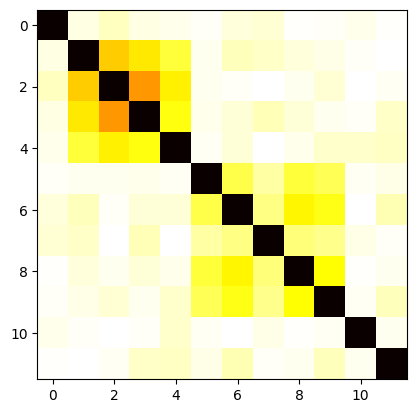

In [594]:
corr = abs(stats.spearmanr(features).correlation)
plt.imshow(1 - corr, cmap='hot', interpolation='none', vmin=0, vmax=1)
plt.show()

By plotting a correlation map using spearman method we can identify if there are any biases in the dataset. Since the students should have been sampled randomly it would be odd if we found a correlation between gender and whether the student was given the test prep as that would be not only unfair but could screw up our model later on. The above image shows mostly no correlation except on the identity and around two clusters. The correlation around the two clusters is to be expected however as those are the one hot encoded categories (race, parental education) which were not binary and thus should be correlated since only one of them can be hot which reveals info about the others. Everywhere else as shown in the image the correlation is nearly negligible.

## 3 Drawing Infrences

Now that we have identified important information such as the maximum performance of any model and that there is no extraneous correlation between the features, we can begin to move onto data analysis. 

## 3.1 The Influence of Parental Education

,math score,reading score,writing score
parental level of education,,,
associate's degree,1.987944,1.824413,1.882579
bachelor's degree,2.696347,2.577525,2.657459
high school,2.035551,1.978498,1.972027
master's degree,3.866829,3.515012,3.503669
some college,1.866076,1.832720,1.957267
some high school,2.333407,2.267675,2.305310


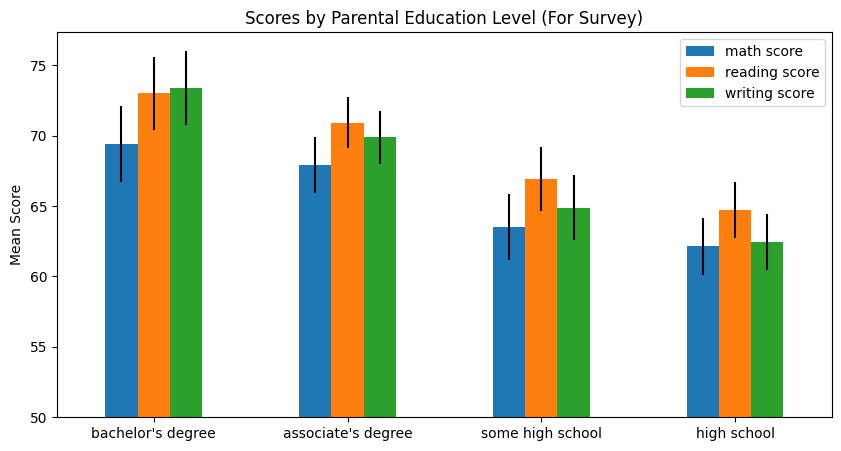

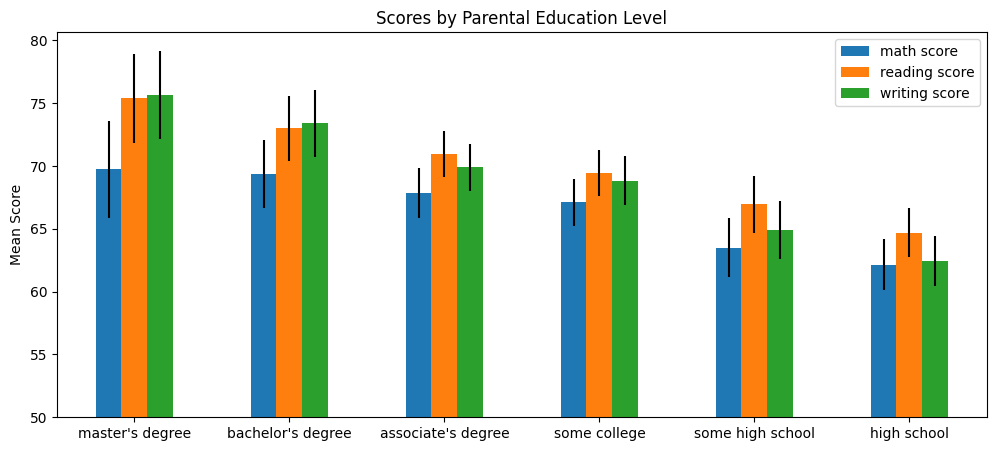

In [595]:
educ = df.groupby("parental level of education").mean().sort_values("math score", ascending=False)
err = df[tests + ["parental level of education"]].groupby("parental level of education").sem() * 1.96
degrees = ["bachelor's degree", "associate's degree", "some high school", "high school"]
offset = 50
educ = educ - offset
educ.loc[degrees,:].plot.bar(bottom=offset, figsize=(10, 5), title="Scores by Parental Education Level (For Survey)", rot=0, table=False, yerr=err.loc[degrees], xlabel="", ylabel="Mean Score")
educ.plot.bar(bottom=offset, figsize=(12, 5), title="Scores by Parental Education Level", rot=0, table=False, yerr=err, xlabel="", ylabel="Mean Score")
err

While the graph on first pass may not seem to show anything surprising as I believe most would expect for test scores to decrease as parental education does but we take a deeper look. Firstly we can see that students typically did stronger on the reading portion of the test and typically worst on math whos mean relative to the others failed to break 70 as education increased. Furthermore the quick reader may pass over the last two bar graphs which contains something surprising. While we would expect students whose parents  completed highschool to then do better on each of the tests our graphs would seem to do the opposite. The next step will be to check if this is a fluke of the data or a significant result.

Also of note the first graph (for survey) I made for CMSC396H and I will comment on how I used it at the end of this document.

In [596]:
someHS = df[df['parental level of education'] == "some high school"][tests]
hs = df[df['parental level of education'] == "high school"][tests]

stats.ttest_ind(someHS, hs)

Ttest_indResult(statistic=array([0.86406295, 1.46128476, 1.58388853]), pvalue=array([0.38810861, 0.1447792 , 0.11406654]))

While on the graph the 3 means all look distinct in regards to reception of a high school diploma, after running a T-Test none of the mean pairs are significantly different at a p-value < 0.05. That said the closest to being significant was the difference between reading scores which had a p-value = 0.114.

## 3.2 Gender And Score

In [597]:
z = 1.96
for test in tests:
	print("Stats for " + test)
	print(df.groupby('gender')[test].describe())
	print()
	print(stats.ttest_ind(df[df['gender'] == 'male'][test], df[df['gender'] == 'female'][test], equal_var=False))
	print("Male Confidence Interval", df[df['gender'] == 'male'][test].mean() - z*df[df['gender'] == 'male'][test].sem(), df[df['gender'] == 'male'][test].mean() + z*df[df['gender'] == 'male'][test].sem())
	print("Female Confidence Interval", df[df['gender'] == 'female'][test].mean() - z*df[df['gender'] == 'female'][test].sem(), df[df['gender'] == 'female'][test].mean() + z*df[df['gender'] == 'female'][test].sem())
	print()

Stats for math score
        count       mean        std   min   25%   50%   75%    max
gender                                                            
female  518.0  63.633205  15.491453   0.0  54.0  65.0  74.0  100.0
male    482.0  68.728216  14.356277  27.0  59.0  69.0  79.0  100.0

Ttest_indResult(statistic=5.398000564160736, pvalue=8.420838109090413e-08)
Male Confidence Interval 67.4465511724309 70.0098803628388
Female Confidence Interval 62.29912009128336 64.96728917512591

Stats for reading score
        count       mean        std   min    25%   50%   75%    max
gender                                                             
female  518.0  72.608108  14.378245  17.0  63.25  73.0  83.0  100.0
male    482.0  65.473029  13.931832  23.0  56.00  66.0  75.0  100.0

Ttest_indResult(statistic=-7.9683565184844, pvalue=4.3762967534977204e-15)
Male Confidence Interval 64.22925702465336 66.71680106663295
Female Confidence Interval 71.36989020182624 73.84632601438999

Stats for writi

Despite the fact that girls and boys both start off with the same inate ability the data here is clear that boys do better on math and girls better on reading and writing. While I would like to say this is due to some extraneous factor as we checked earlier in the data there is no strong biases with other features with gender. Furthermore with p-values so small for each of the t-tests it is highly improbable this was a statistical fluke. 

Also I have used the "Reading Score" score table from above to ask a question in my survey for 396 as to whether participants think girls did *statistically significantly* better than boys on reading. Here I hope to identify how deep participants go, will they just look at the difference in means or will they mistakenly assume the large standard deviations leave room for overlap, or will they go as far to run their own t tests as I have which show a significant difference.

## 3.3 Identifying the most important features

Before I begin with building a predictor to run on the dataset it will be important to understand what the most important features are to a students success.

In [598]:
k = 3
kModel = SelectKBest(f_regression, k=k)
for test in tests:
	kBest = kModel.fit(features, df[test])

	zipped = zip(features.columns, kBest.scores_)
	sorted_zipped = sorted(zipped, key=lambda x: x[1], reverse=True)
	print("Best features for", test, [x[0] for x in sorted_zipped[:k]])
	# print("Best features for", test, features.columns[kBest.get_support()])
	# print(kBest.scores_)

kBest = kModel.fit(features, df[tests].mean(axis=1))

zipped = zip(features.columns, kBest.scores_)
sorted_zipped = sorted(zipped, key=lambda x: x[1], reverse=True)
print("Best features for", test, [x[0] for x in sorted_zipped[:k]])

Best features for math score ['lunch_standard', 'race/ethnicity_group E', 'test preparation course_none']
Best features for reading score ['gender_male', 'test preparation course_none', 'lunch_standard']
Best features for writing score ['test preparation course_none', 'gender_male', 'lunch_standard']
Best features for writing score ['lunch_standard', 'test preparation course_none', 'parental level of education_high school']


While we have previously looked at how gender and education both play a role there were a number of othe features that heavily influenced students scores. Among every set of features was whether the student had lunch which as I can atest to is a very important factor for me before I take a test. Also always present was whether the student took the test preparation material which I believe also makes intuitive sense.

## 3.4 Effect of Test Preparation and Lunch

/var/folders/_t/4_m8pb3d3xs763zf2ztl10k40000gn/T/ipykernel_18769/2827068868.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df['lunch'] == 'free/reduced'][df['test preparation course'] == 'none'][tests].mean()


math score       56.508929
reading score    61.602679
writing score    58.736607
dtype: float64

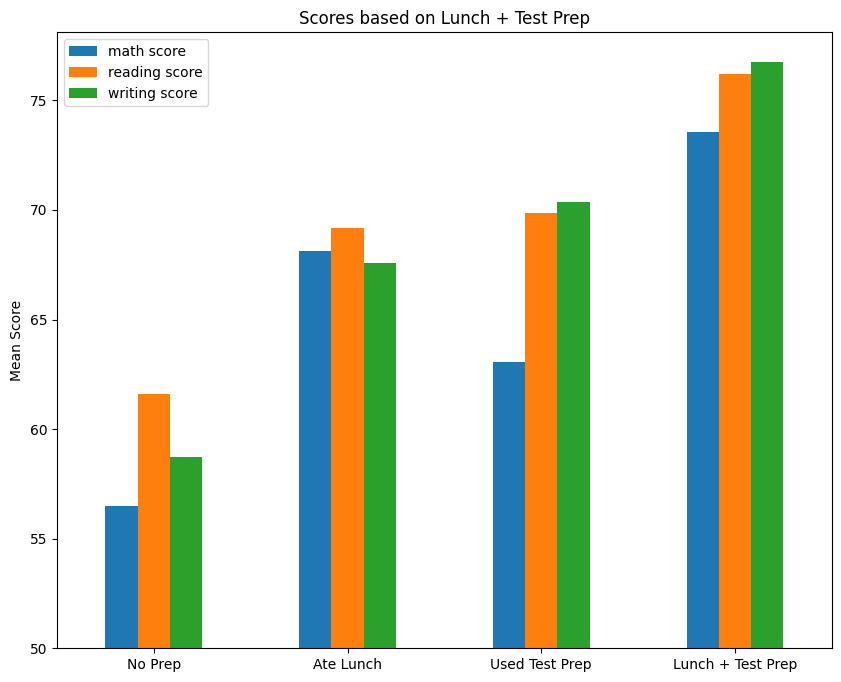

In [599]:
prepness = features[['lunch_standard', 'test preparation course_none']]

# Combine feature columns into one without losing information
prepness = prepness['lunch_standard'] + (10*(1 - prepness['test preparation course_none']))
prepness = prepness.apply(lambda x: "No Prep" if x == 0 else "Ate Lunch" if x == 1 else "Used Test Prep" if x == 10 else "Lunch + Test Prep")

# Add the test scores
prepness = pd.concat([prepness, df[tests]], axis=1).groupby(0).mean().sort_values("reading score", ascending=True)
offset = 50
prepness = prepness - offset
prepness.plot.bar(title="Scores based on Lunch + Test Prep", rot=0, table=False, xlabel="", ylabel="Mean Score", figsize=(10, 8), bottom=offset)

df[df['lunch'] == 'free/reduced'][df['test preparation course'] == 'none'][tests].mean()

As the graph shows the worst case for all 3 tests was no lunch or test prep and the best case was both of those. Intestingly having one of either lunch or the test prep were about as effective for the reading and writing tests. In contrast just eating lunch had a much higher increase of scores over just doing the test prep for math scores, however I can definently understand that having chosen food over studying before. 

## 4 Constructing a model

Now that we have a good understanding of the data and what is going on behind these students I can begin to create a model for predicting what a students score will be.

In [605]:
best_model = None
best_score = -100000000

for trees in [1,10,25,50,100,150,200,250,300]:
	for depth in [1,2,3,4,5,6,7,8,9,10,11,12]:
		model = RandomForestRegressor(n_estimators=trees, max_depth=depth, n_jobs=-1, random_state=42)
		maths = cross_val_score(model, features, df[tests[0]], cv=KFold(n_splits=10, shuffle=True, random_state=42)).mean()
		reading = cross_val_score(model, features, df[tests[1]], cv=KFold(n_splits=10, shuffle=True, random_state=42)).mean()
		writing = cross_val_score(model, features, df[tests[2]], cv=KFold(n_splits=10, shuffle=True, random_state=42)).mean()
		score = (maths + reading + writing) / 3

		if score > best_score:
			best_score = score
			best_model = model
			print("New best score of", score, "with", trees, "trees and", depth, "depth")
		else:
			# print("Score of", score, "with", trees, "trees and", depth, "depth")
			pass

New best score of 0.06973442260025824 with 1 trees and 1 depth
New best score of 0.1364316724098514 with 1 trees and 2 depth
New best score of 0.1549862903407436 with 1 trees and 3 depth
New best score of 0.1671857893242649 with 10 trees and 2 depth
New best score of 0.19329764190710974 with 10 trees and 3 depth
New best score of 0.20097482578986647 with 10 trees and 4 depth
New best score of 0.20099169643133186 with 25 trees and 4 depth
New best score of 0.20499583061522764 with 50 trees and 4 depth
New best score of 0.2053855724026883 with 100 trees and 4 depth


In [625]:
params = best_model.get_params()
print(params)
maths_model = RandomForestRegressor(**params).fit(features, df[tests[0]])
reading_model = RandomForestRegressor(**params).fit(features, df[tests[1]])
writing_model = RandomForestRegressor(**params).fit(features, df[tests[2]])

print("Maths R^2 is", maths_model.score(features, df[tests[0]]))
print("Reading R^2 is", reading_model.score(features, df[tests[1]]))
print("Writing R^2 is", writing_model.score(features, df[tests[2]]))

features.iloc[0:2]

{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': 4, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': -1, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}
Maths R^2 is 0.25766283144632673
Reading R^2 is 0.2379818664674339
Writing R^2 is 0.3284270149147154


,gender_male,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_standard,test preparation course_none
0,0,1,0,0,0,1,0,0,0,0,1,1
1,0,0,1,0,0,0,0,0,1,0,1,0


After testing over 108 different combinations of hyper parameters and looking at the average 10-fold cross validation score the best model had a max depth for each tree and 100 total trees. In order to understand how the tree performed I will take a look at the first two students from the dataset. Recalling that from 1.2 the max R^2 for each of these test was 0.38, 0.37, and 0.44 respectively I find it quite impressive that the model was able to explain at least 65% of the variation in the data that is possibly could given the features it had.

/opt/homebrew/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/base.py:450: U

Maths score for student A is 72 predicted score is [66.11057632]
Reading score for student A is 72 predicted score is [73.71140262]
Writing score for student A is 74 predicted score is [73.94871774]

Maths score for student B is 69 predicted score is [71.98676157]
Reading score for student B is 90 predicted score is [80.34813001]
Writing score for student B is 88 predicted score is [82.27045371]


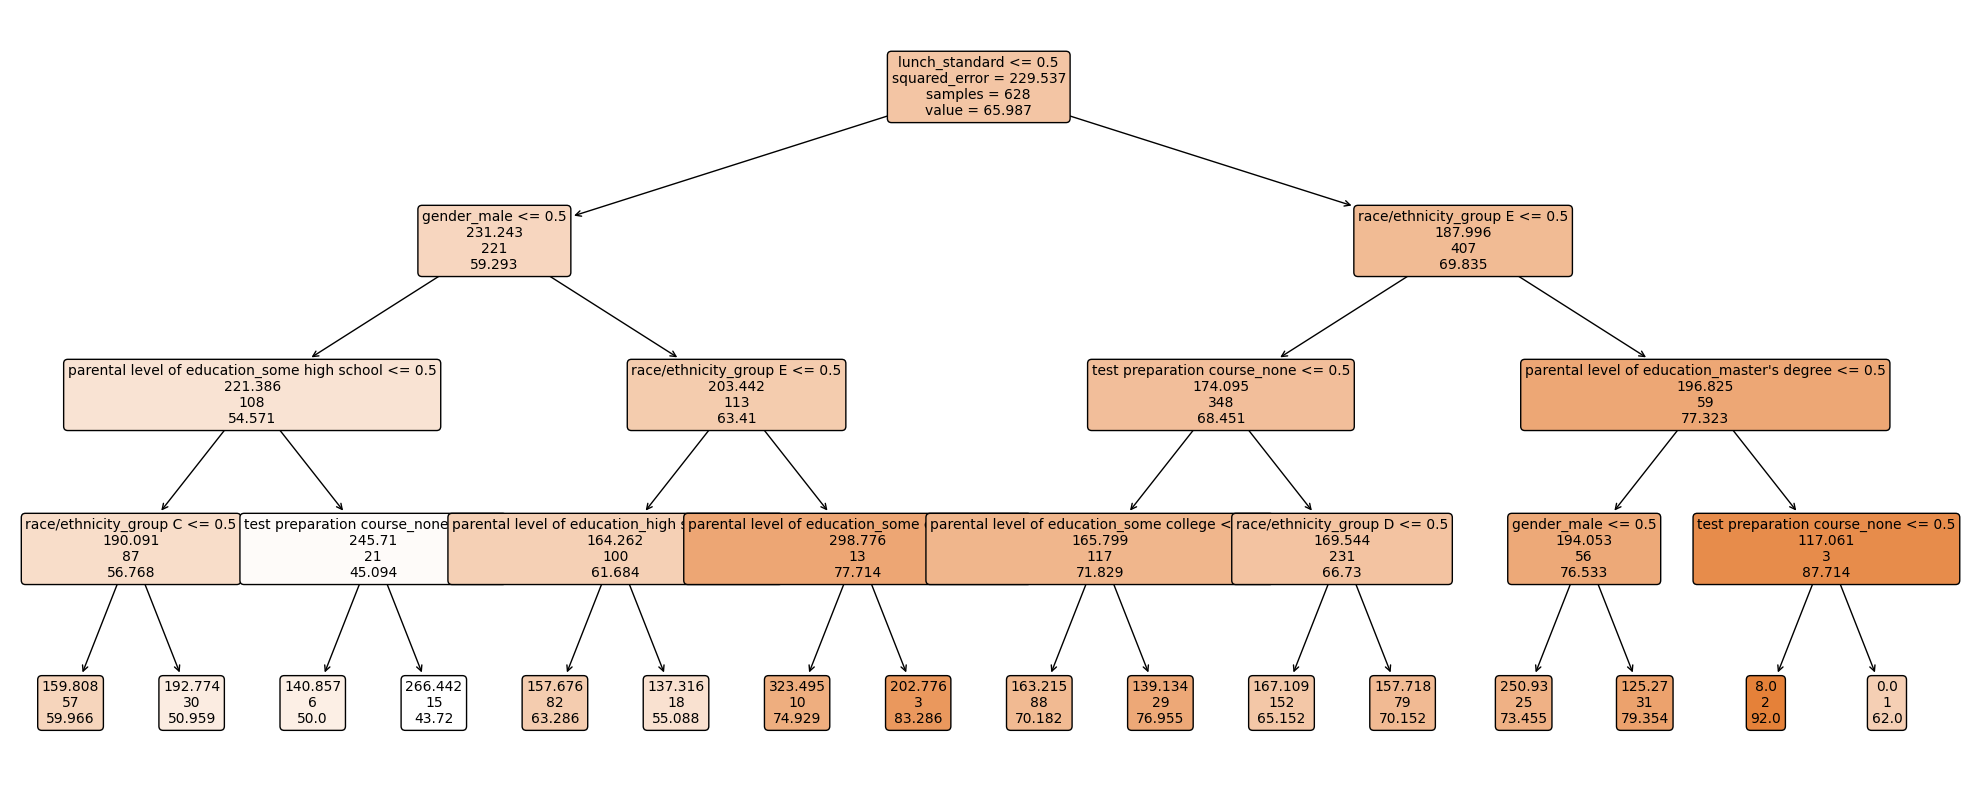

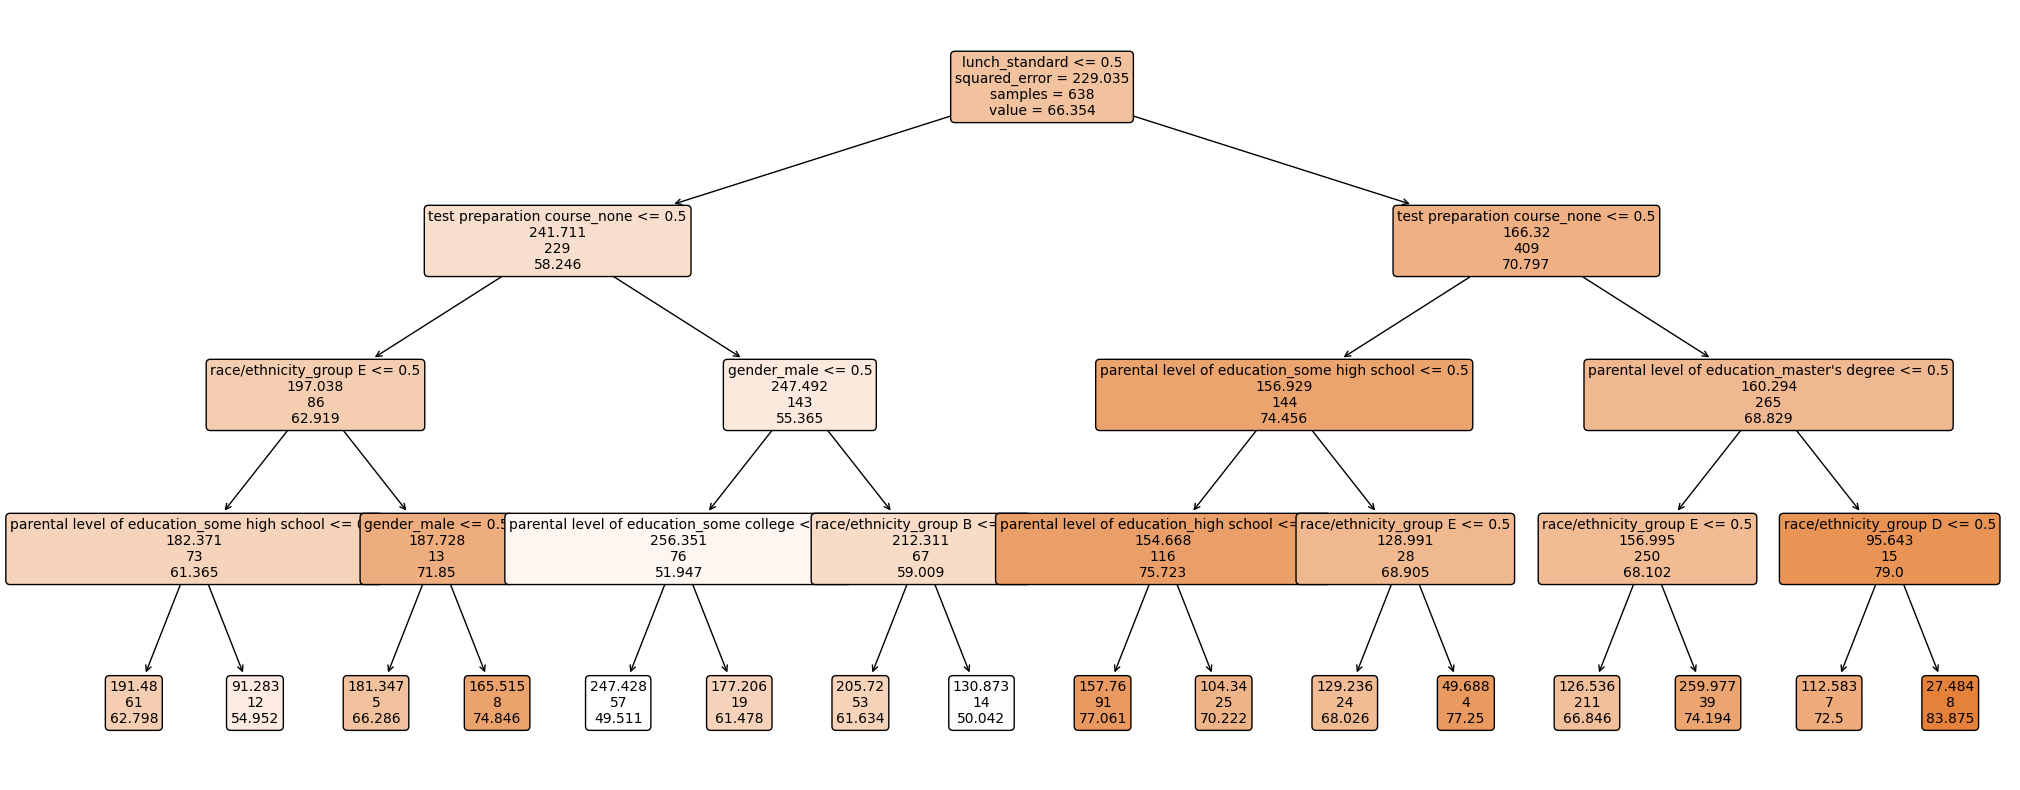

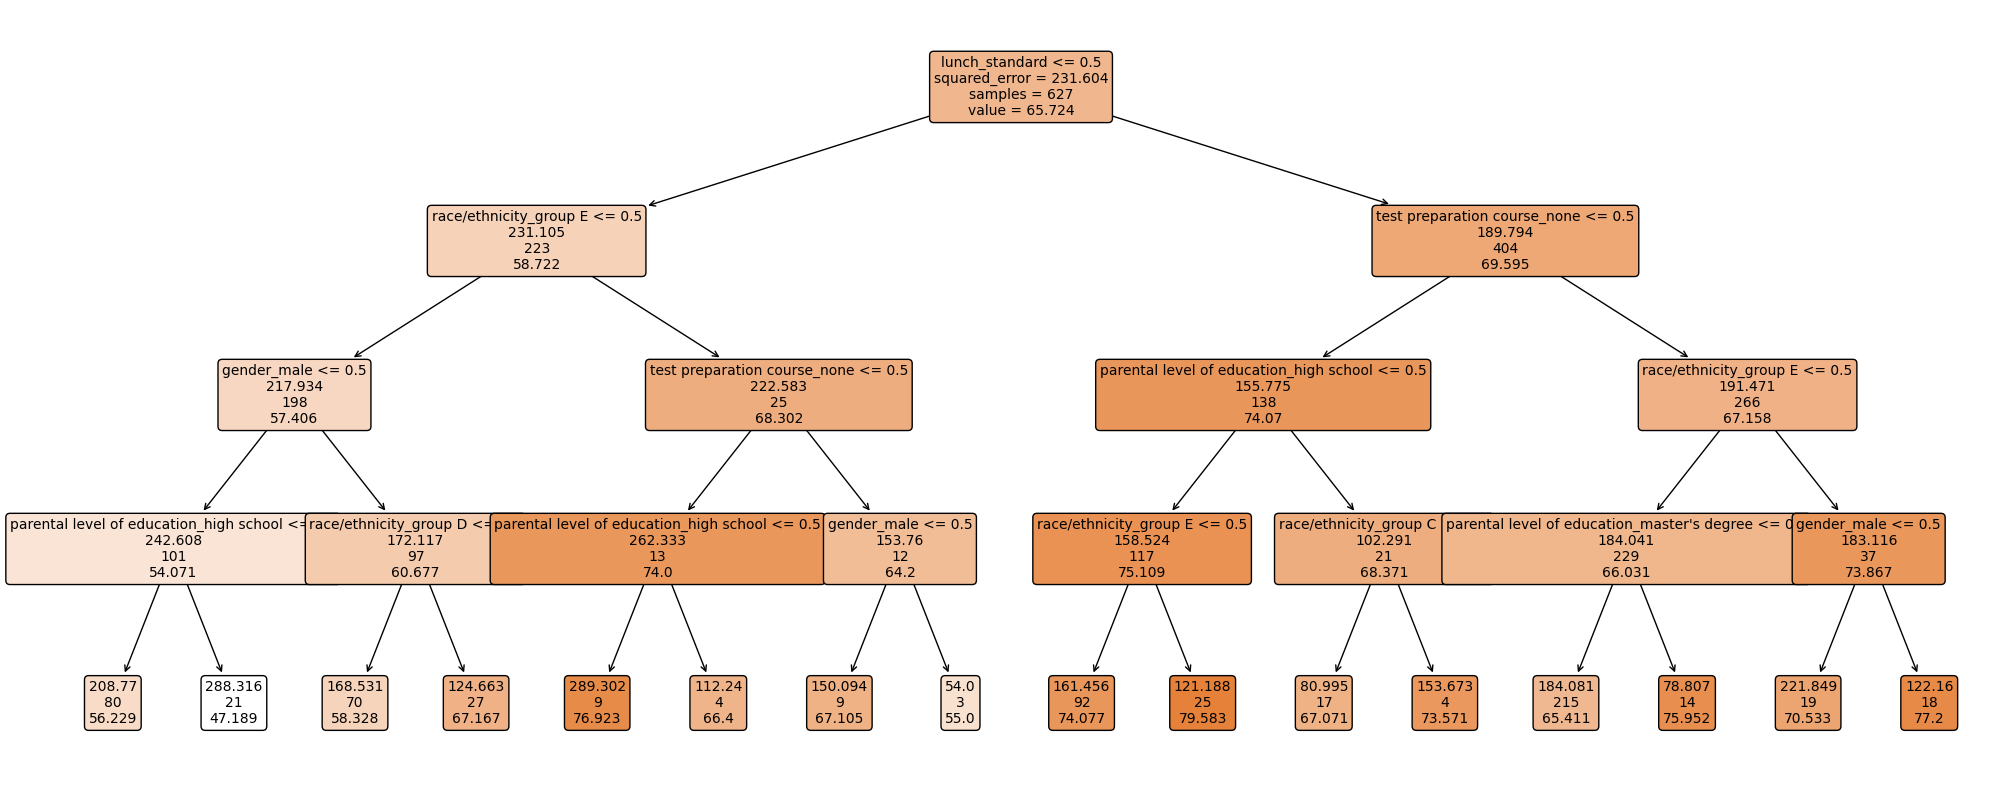

In [656]:
studentA = features.iloc[0]
studentB = features.iloc[1]

print("Maths score for student A is", df.iloc[0][tests[0]], "predicted score is", maths_model.predict([studentA]))
print("Reading score for student A is", df.iloc[0][tests[1]], "predicted score is", reading_model.predict([studentA]))
print("Writing score for student A is", df.iloc[0][tests[2]], "predicted score is", writing_model.predict([studentA]))
print()
print("Maths score for student B is", df.iloc[1][tests[0]], "predicted score is", maths_model.predict([studentB]))
print("Reading score for student B is", df.iloc[1][tests[1]], "predicted score is", reading_model.predict([studentB]))
print("Writing score for student B is", df.iloc[1][tests[2]], "predicted score is", writing_model.predict([studentB]))


_, ax = plt.subplots(1, 1, figsize=(25, 10))
plot_tree(maths_model.estimators_[0], feature_names=features.columns, filled=True, rounded=True, fontsize=10, max_depth=4, label="root", ax=ax)
_, ax = plt.subplots(1, 1, figsize=(25, 10))
plot_tree(maths_model.estimators_[1], feature_names=features.columns, filled=True, rounded=True, fontsize=10, max_depth=4, label="root", ax=ax)
_, ax = plt.subplots(1, 1, figsize=(25, 10))
plot_tree(maths_model.estimators_[2], feature_names=features.columns, filled=True, rounded=True, fontsize=10, max_depth=4, label="root", ax=ax)
pass

While the model is far from perfect in predicting the scores for the two students, it is not too far off from their true scores. To get a better idea of whats going on behing the scenes I have also printed 3 of the forests trees to trace what the values would have been

## 5 Conclusion
All in all I believe this project was a success and we were able to make a number of conslusions based on the data. After initially getting the data we were able to initially understand any biases present in the data as well as what the best model could perform at. Next we were able to look at the effect of parental education and gender to understand the effect those variables had on the students scores. Then after identifying the most strongly correlated features with scores using a K-best we did further analysis to understand the effect of lunch and test prep on scores. Finally we were able to build a Random Forest Regressor which considering the spread of students score given any combination of features did pretty well.

## 6 Post Closing

I also used this dataset to conduct a study for 396 on peoples ability to misinterpret data and their own biases. To run the study I took 2 visualizations from this dataset (the parental education graph and the output from df.describe on the gender stratified reading scores) and combined them with a few other visualizations and then served them to particiapants after asking them a questions about each one. Below are 2 paragraphs from our final report they don't 100% apply to this project but I thought the results were interesting. 

For the first visualization, we simply layed out the raw data since there is no way to hide extraneous information such as in the previous two examples. Thus for the reading score, we showed the mean, count, standard deviation, range, and quartile cutoffs all respective to gender. We then asked the participants “Do you think that girls did statistically significantly better than boys on the following reading scores?” This data visualization resulted in three different levels of reasonings. The first was that a participant may see the two means (72.6 girls, 65.5 boys) being different and then say girls did better simply “because they had a higher mean”. This accounted for 11 of the 22 responses where participants said they only looked at the mean. Of note here is that 5 of the 11 responses referenced the standard deviations both being approximately the same as evidence along with the difference of means by saying, “[girls did better] beause the mean was larger with a similar standard deviation across both sample sets”. The next level of reasoning would have participants see the means but also the standard deviation (14.4 girls, 13.9 boys) which lead some particpants to say “The stdev is too large for significance.” This shows that participants had a grasp on what statistical significance calls for but not enough to identify the need to run a paired t test which was only realized by one of the participants. 

When quickly reading through any piece of information the brain can easily skip over important information when it does not necessarily fit the environment. For the second education visualization we created 4 bar graphs which showed the test scores for 4 different education levels across bachelors, associates, high school, and some high school. The ordering of in terms of scores was bachelors, associates, some high school, and high school. The surprising thing is that students whose parents only had some high school did better than parents with a high school diploma. The even more surprising thing is that 8 of the 22 did not catch this point and instead said that each step of education resulted in higher scores. Also due to the open ended nature of the question “What conclusions would you draw from this chart?” some  participants (3) did not even consider the education correlation and instead looked at how each of the tests compared to each stating, “Math is statistically more challenging.” This goes to show that when displaying data to a person it is very easy for them to read over or misinterpret what is being shown. 


